# Regression Code

In [1]:
import numpy as np

def calculate_X(x_data, y_data):
    if len(x_data.shape) < 2:
        x_data = np.atleast_2d(x_data).reshape((x_data.shape[0], 1))
    n=y_data.shape[0]
    p=x_data.shape[1]
    X = np.zeros((n, p+1), dtype=float)
    
    for i in range(n):
        X[i, :] = np.array([1] + list(x_data[i]))
    return X

def calculate_theta_hat(x_data, y_data):
    X = calculate_X(x_data, y_data)
    return np.linalg.pinv(X)@y_data

def calculate_y_hat(x, theta):
    x = np.array(x)
    if len(x.shape) < 2:
        x = np.atleast_2d(x).reshape((x.shape[0], 1))
    m = x.shape[0]
    y_hat = np.zeros((m,), dtype=float)
    for i in range(m):
        y_hat[i] = theta[0] + np.dot(theta[1:], x[i])
    return y_hat

# Problem 1
(a)

In [2]:
import numpy as np
# USING ONE-HOT ENCODING, INDEX 0 will be BEDNAR, 1 NELSON, and 2 ANDERSON
BEDNAR = 0
NELSON = 1
ANDERSON = 2

x_data = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
])

y_data = np.array([
    10.43,
    5.71,
    9.18,
    8.82,
    5.23,
    5.66,
    6.74,
    5.28,
    6.20,
    8.35,
    4.51,
    5.12,
])

theta_hat_1 = calculate_theta_hat(x_data, y_data)
print(f"theta_hat:\n {theta_hat_1}")

theta_hat:
 [5.076875 3.458125 0.650625 0.968125]


(b)
The first parameter 5.076875 is a baseline for all of these talks. Some simple conclusions we can draw from the parameters is that all authors will use at least 5.077% 'the' in their talks with Anderson speaking the most at 3.45% above the baseline, Nelson the least at 0.65% above the baseline, and Anderson in the middle at 0.968% above the baseline.

Our model predicts that Bednar for example, who is represented by the second parameter 3.458125, will have a % words = "the" of 5.076875% + 3.458125% = 8.535%. We calculate y_hat for each author below, and compare it to the vavlue of simply averages y from the training data for the respective authors.



In [3]:
percentage_the_bednar = theta_hat_1[0] + theta_hat_1[BEDNAR + 1]
percentage_the_nelson = theta_hat_1[0] + theta_hat_1[NELSON + 1]
percentage_the_anderson = theta_hat_1[0] + theta_hat_1[ANDERSON + 1]

print(f"y_hat(Bednar): {percentage_the_bednar} ")
print(f"y_avg(Bednar): {1/4 * np.sum(y_data[0:4])} ")
print("\n")
print(f"y_hat(Nelson): {percentage_the_nelson} ")
print(f"y_avg(Nelson): {1/4 * np.sum(y_data[4:8])} ")
print("\n")
print(f"y_hat(Anderson): {percentage_the_anderson} ")
print(f"y_avg(Anderson): {1/4* np.sum(y_data[8:12])} ")

y_hat(Bednar): 8.535000000000004 
y_avg(Bednar): 8.535 


y_hat(Nelson): 5.727500000000004 
y_avg(Nelson): 5.727500000000001 


y_hat(Anderson): 6.045000000000003 
y_avg(Anderson): 6.045000000000001 


Thus, with no other information available, it appears that one-hot encoding is equlivalent to taking the averge of the training samples associated with a particular categorical input. This makes perfect sense to me, since the only inputs we are considering are the authors and their percetage of the word "the" (their label). The model is not going to improve on a naive average, because there is not any more information to work with.

(c)
We will extend this model to include the % words = "of" as an input parameter

In [4]:
x_data = np.array([
    [1, 0, 0, 5.72],
    [1, 0, 0, 4.14],
    [1, 0, 0, 6.18],
    [1, 0, 0, 5.15],
    [0, 1, 0, 2.47],
    [0, 1, 0, 3.14],
    [0, 1, 0, 2.73],
    [0, 1, 0, 2.91],
    [0, 0, 1, 4.19],
    [0, 0, 1, 5.12],
    [0, 0, 1, 3.82],
    [0, 0, 1, 4.10],
])

y_data = np.array([
    10.43,
    5.71,
    9.18,
    8.82,
    5.23,
    5.66,
    6.74,
    5.28,
    6.20,
    8.35,
    4.51,
    5.12,
])

In [5]:
theta_hat_2 = calculate_theta_hat(x_data, y_data)
print(f"theta_hat:\n {theta_hat_2}")

theta_hat:
 [-1.47184422 -1.16830056  1.26633909 -1.56988275  2.10951294]


These parameters are are more challenging to interpret, but the do suggest something concrete: According to the model, authors will use some percentage of words "of" in their talks, otherwise, the model would predict negative values for the percentage of words "the".

(d)

In [6]:
print(f"y_hat1(Nelson): {calculate_y_hat([[0, 1, 0]], theta_hat_1)} ")
print(f"y_hat2(Nelson): {calculate_y_hat([[0, 1, 0, 2.6]], theta_hat_2)} ")

y_hat1(Nelson): [5.7275] 
y_hat2(Nelson): [5.2792285] 


# Problem 2

![](HW4_P2_PAGE1.png)
![](HW4_P2_PAGE2.png)
![](HW4_P2_PAGE3.png)

# Problem 3 - Polynomial Regression

In [7]:
def get_polynomial_inputs(x_data, order=1):
    x_data = np.array(x_data)
    if len(x_data.shape) < 2:
        x_data = np.atleast_2d(x_data).reshape((x_data.shape[0], 1))

    num_data_points = x_data.shape[0]
    new_x_data = np.zeros((num_data_points, order+1))
    
    for i, x in enumerate(x_data[:, 0]):
        new_x_data[i, :] = np.array([x**j for j in range(order+1)])
    
    return new_x_data[:, 1:] # We don't need to return the first unity term, in fact, our linear regression code doesn't expect it

In [8]:
x_data = np.array([[168],[168],[250],[192],[252],[170],[217],[157],[211],[192],[165],[217],[227],[199],[236],[220],[226],[185],[219],[216],[182],[204],[213],[189],[249],[145],[170],[210],[205],[235]])
y_data = np.array([40,33,32,25,24,36,35,35,26,23,36,29,27,26,22,35,31,28,26,26,34,30,31,29,19,43,37,29,26,25])

theta_hat (Linear) : [56.72428377 -0.1319968 ]


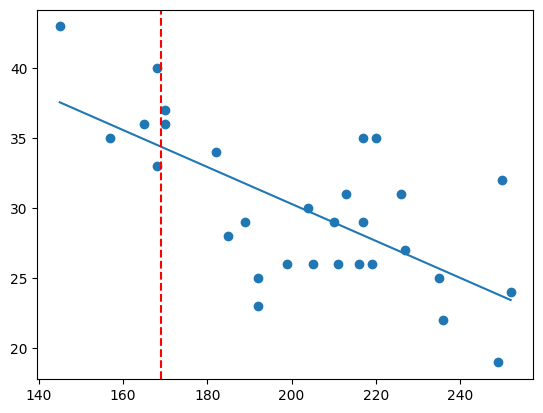

In [9]:
import matplotlib.pyplot as plt

theta_hat_linear = calculate_theta_hat(x_data, y_data)
print(f"theta_hat (Linear) : {theta_hat_linear}")

x_star = np.linspace(np.min(x_data), np.max(x_data), 1000)
y_hat_star = calculate_y_hat(x_star, theta_hat_linear)
plt.scatter(x_data[:, 0], y_data)
plt.plot(x_star, y_hat_star)
plt.axvline(169, color="red", linestyle="--")

theta_hat (Quadratic) : [ 1.17036043e+02 -7.44081106e-01  1.52204461e-03]


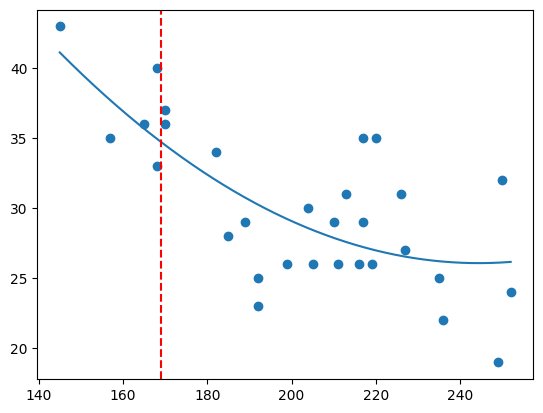

In [10]:
x_data_quadratic = get_polynomial_inputs(x_data, order=2)
theta_hat_quadratic = calculate_theta_hat(x_data_quadratic, y_data)
print(f"theta_hat (Quadratic) : {theta_hat_quadratic}")

x_star_quadratic = get_polynomial_inputs(x_star, order=2)
y_hat_star_quadratic = calculate_y_hat(x_star_quadratic, theta_hat_quadratic)

plt.scatter(x_data[:, 0], y_data)
plt.plot(x_star, y_hat_star_quadratic)
plt.axvline(169, color="red", linestyle="--")

theta_hat (Cubic) : [ 4.16364477e+02 -5.32929896e+00  2.45817347e-02 -3.81084672e-05]


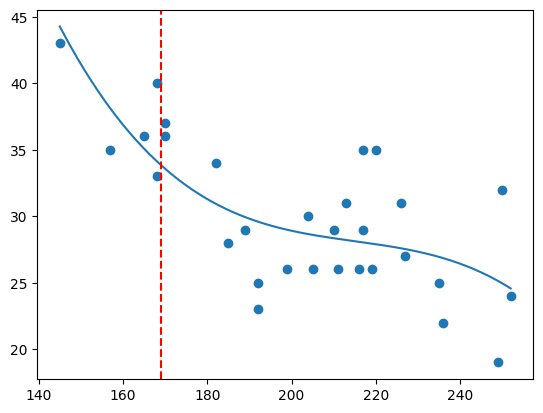

In [11]:
x_data_cubic = get_polynomial_inputs(x_data, order=3)
theta_hat_cubic = calculate_theta_hat(x_data_cubic, y_data)
print(f"theta_hat (Cubic) : {theta_hat_cubic}")

x_star_cubic = get_polynomial_inputs(x_star, order=3)
y_hat_star_cubic = calculate_y_hat(x_star_cubic, theta_hat_cubic)

plt.scatter(x_data[:, 0], y_data)
plt.plot(x_star, y_hat_star_cubic)
plt.axvline(169, color="red", linestyle="--")

theta_hat (6th order) : [ 1.37684201e-05  8.80268319e-04  3.40196000e-02 -4.85473949e-04
  2.56651315e-06 -5.69678539e-09  4.18424375e-12]


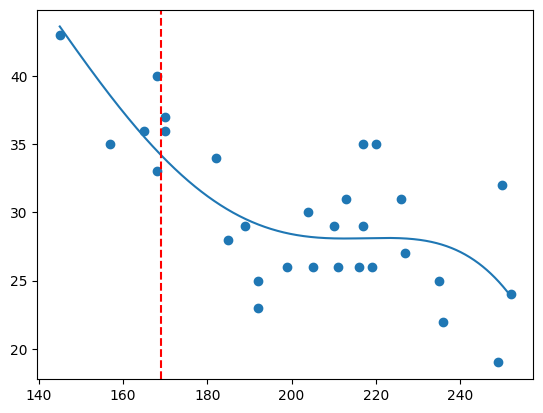

In [12]:
x_data_order_6 = get_polynomial_inputs(x_data, order=6)
theta_hat_order_6 = calculate_theta_hat(x_data_order_6, y_data)
print(f"theta_hat (6th order) : {theta_hat_order_6}")

x_star_order_6 = get_polynomial_inputs(x_star, order=6)
y_hat_star_order_6 = calculate_y_hat(x_star_order_6, theta_hat_order_6)

plt.scatter(x_data[:, 0], y_data)
plt.plot(x_star, y_hat_star_order_6)
plt.axvline(169, color="red", linestyle="--")

(e)

In [13]:
print(f"y_hat linear: {calculate_y_hat(get_polynomial_inputs([[169]], order=1), theta_hat_linear)}")
print(f"y_hat quadratic: {calculate_y_hat(get_polynomial_inputs([[169]], order=2), theta_hat_quadratic)}")
print(f"y_hat cubic: {calculate_y_hat(get_polynomial_inputs([[169]], order=3), theta_hat_cubic)}")
print(f"y_hat 6th order: {calculate_y_hat(get_polynomial_inputs([[169]], order=6), theta_hat_order_6)}")

y_hat linear: [34.41682463]
y_hat quadratic: [34.75745207]
y_hat cubic: [33.84958427]
y_hat 6th order: [34.21079776]


(f)


# Problem 4

(a) A rock climber enters a climbing competition at her local gym. She has kept track of her own
climbing statistics over the past several months, and she knows that on average she completes a
V6-rated climb in her first try with probability 0.72. Suppose the competition allows her a single
try on 6 climbs. What is the probability that she completes more than 4 of the 6 climbs?

The binomial distribution models the # of successful trials out of n IID Bernoulli trials. 
$$ P_Y(y) = {n\choose y} p^y (1-p)^{n-y}, y=0,1,...,n$$

According to wikipedia: "In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p)."

Thus, p = 0.72 and n = 6. We need to sum the probabilities of $P_Y(y)$ for all y > 4.

In [ ]:
from math import comb as choose

def binomial(y, n=6, p=0.72):
    return choose(n, y)*(p**y)*(1-p)**(n-y)

P = binomial(5) + binomial(6)

print(f"P(success for y>4) = {P}")

P(success for y>4) = 0.46438023168


This is equivalent to the distribution of 1 - CUMULUTAIVE_DISTRIBUTION_FUNCTION of this binomial

In [34]:
from scipy.stats import binom

print(1-binom.cdf(4, 6, 0.72))

0.46438023168


(b) An engineer designs a protocol to transmit packets over the Internet with high reliability. Sup-
pose packets are retransmitted up to 8 times before giving up. During lunch time, the Internet is
busier than usual, and individual packets are dropped with probability 0.08. What is the average
number of times a random packet will need to be transmitted to complete the task? What is the
probability that the 8-repeat protocol will fail (i.e., the packet is dropped each of 8 times)?



Binomial - number of successful trials of of n IID bernoulli trials

Because the failure rate of the dropping individual packets is independently and identically distributed, we can still use the binomial distribution. If we choose the probability of "success", p=0.08 to just mean the probability that a packet is dropped, and the number of bernoulli events as n= 8, then P_Y(8) will be the probability of each of 8 independent bernoulli events failing.

In [38]:
binomial(y=8, n=8, p=0.08)
binom.pmf(8, n=8, p=0.08)

np.float64(1.6777216000000004e-09)

Thus, the probability of that the 8-repeat protocol will fail is 1.677*10^-7 %

(c) BYU Capstone students designed heating systems for homes in Mongolia several years ago to
allow for cleaner air inside homes compared to burning coal. After the systems were installed,
some families preferred to burn coal at night because it was cheaper (since the government
subsidized the cost of electricity only in the daytime hours). Suppose you wanted to model a
family’s decision using a random variable and estimate the parameters of the random variable
over time. Which random variable would you use, and how would you estimate its parameter(s)?



Sounds pretty bernoulli, we need to find a way to estime the parameter p for a family choosing to burn coal rather than use the new heating system. One practical way to do this would be to track the decision of 100 families who recieved the new heating system. If 70 percent of them burned coal at night, then we would say that p=0.7, and the probability of a particular family choosing to burn coal would be 0.7, while the probability of them continuing to use the new heating system woud be 1 - 0.7 = 0.3

(d) Cars appear at your favorite intersection at a rate of six cars per minute. What is the probability
that you wait a minute without seeing any cars? (This one can be solved with two different types
of random variables. Think about it and solve it both ways.)



The second method for solving this problem, is to use an exponential random variable which models the distance (time) bebtwen successive events in a poissonian process (seeing a car).

The parameter, $\lambda$ is the avg number of events (seeing a car) per unit interval, which in this case is 6 cars/minute. Thus, by integ

Maybe exponential ()  and poissonian (prob you wait a minute without seeing any cars by counting cars)

In [ ]:
integrate for y=1 to infinity

(e) In your Capstone Design Team, you experience thermal noise on one of your signals. You want
to model the noise. Suppose the signal’s value without the noise is 1, the mean of the noise is
zero, and the variance of the noise is 1/4. What is the probability that the signal you measure
(which is the original signal plus noise) is less than 0.5 or greater than 1.5?

Clearly this is Gaussian.